In [21]:
import numpy as np
from sklearn.preprocessing import LabelEncoder , OrdinalEncoder

In [4]:
X = np.array(['Chat', 
         'Chien',
         'Chat',
         'Oiseau'])

In [9]:
transformer = LabelEncoder()
transformer.fit_transform(X)

array([0, 1, 0, 2])

# Label Encoder

In [12]:
import matplotlib.pyplot as plt

In [13]:
y = np.array(['chat', 'chien', 'chat', 'oiseau'])

In [17]:
encoder = LabelEncoder()
encoder.fit_transform(y)

array([0, 1, 0, 2])

In [18]:
encoder.inverse_transform(np.array([0, 0, 2, 2])) 

array(['chat', 'chat', 'oiseau', 'oiseau'], dtype='<U6')

# Ordinal Encoder

In [23]:
X = np.array([['Chat', 'Poils'],
            ['Chien', 'Poils'],
            ['Chat', 'Poils'],
            ['Oiseau', 'Plumes']])

In [24]:
encoder = OrdinalEncoder()
encoder.fit_transform(X)

array([[0., 1.],
       [1., 1.],
       [0., 1.],
       [2., 0.]])

  # Label Binarizer

In [25]:
from sklearn.preprocessing import LabelBinarizer

In [ ]:
y = np.array(['chat', 'chien', 'chat', 'oiseau'])

In [27]:
encoder = LabelBinarizer(sparse_output=True)
encoder.fit_transform(y)

<4x3 sparse matrix of type '<class 'numpy.int64'>'
	with 4 stored elements in Compressed Sparse Row format>

# One Hot Encoder

In [29]:
from sklearn.preprocessing import OneHotEncoder
X = np.array([['Chat', 'Poils'],
            ['Chien', 'Poils'],
            ['Chat', 'Poils'],
            ['Oiseau', 'Plumes']])

In [30]:
encoder = OneHotEncoder()
encoder.fit_transform(X)

<4x5 sparse matrix of type '<class 'numpy.float64'>'
	with 8 stored elements in Compressed Sparse Row format>

# Normalisation MinMaxScaler

In [34]:
from sklearn.preprocessing import MinMaxScaler

In [35]:
X = np.array([[70],
            [80],
            [120]])

In [39]:
scaler = MinMaxScaler()
scaler.fit_transform(X)

array([[0. ],
       [0.2],
       [1. ]])

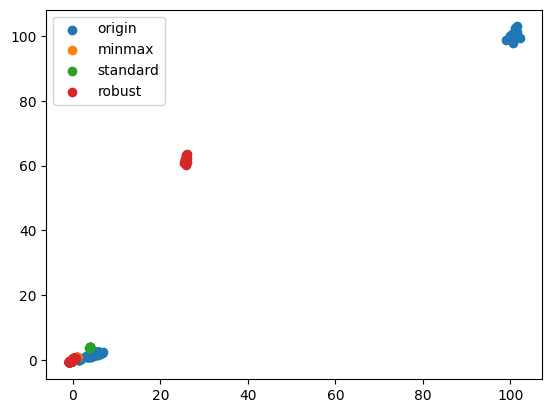

In [74]:
from sklearn.datasets import load_iris
from sklearn.preprocessing import StandardScaler , RobustScaler
iris = load_iris()
X = iris.data

outliers = np.full((10,4) , 100) + np.random.randn(10,4)
X = np.vstack((X, outliers))
X_min = MinMaxScaler().fit_transform(X)
X_std = StandardScaler().fit_transform(X)
X_robust = RobustScaler().fit_transform(X)
plt.scatter(X[:, 2], X[:, 3])
plt.scatter(X_min[:, 2], X_min[:, 3])
plt.scatter(X_std[:, 2], X_std[:, 3])
plt.scatter(X_robust[:, 2], X_robust[:, 3])
# le premier plt scatter en origin et l'autre en bleu
plt.legend(['origin', 'minmax' , 'standard', 'robust'])
plt.show()

# Standardisation

In [53]:
from sklearn.preprocessing import StandardScaler

In [54]:
X = np.array([[70],
            [80],
            [120]])

In [56]:
scaller = StandardScaler()
scaller.fit_transform(X)

array([[-0.9258201 ],
       [-0.46291005],
       [ 1.38873015]])

# RobustScaler(en haut exemple)

# Polynomial Features

In [76]:
from sklearn.preprocessing import PolynomialFeatures

In [77]:
X = np.array([[1],
              [2],
              [0.5]])

In [79]:
PolynomialFeatures(3).fit_transform(X)

array([[1.   , 1.   , 1.   , 1.   ],
       [1.   , 2.   , 4.   , 8.   ],
       [1.   , 0.5  , 0.25 , 0.125]])

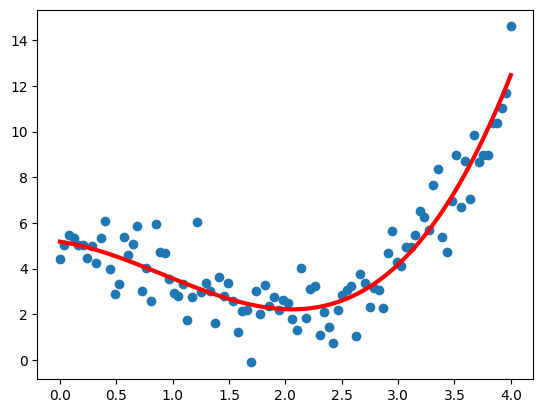

In [83]:
from sklearn.linear_model import LinearRegression
X = np.linspace(0, 4, 100).reshape(100, 1)
y = X**2 + 5*np.cos(X) + np.random.randn(100, 1)

X_poly = PolynomialFeatures(3).fit_transform(X)

plt.scatter(X, y)
model = LinearRegression().fit(X_poly, y)
y_pred = model.predict(X_poly)

plt.plot(X, y_pred, color='red' , lw=3)

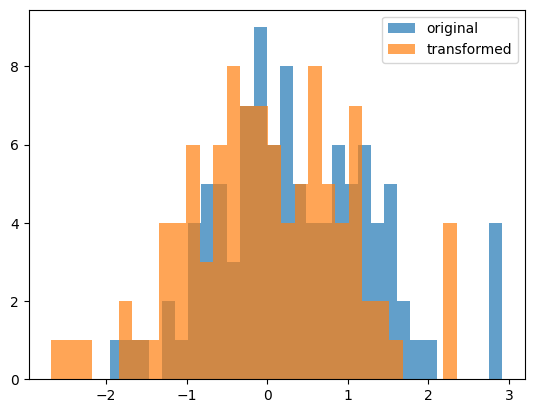

In [93]:
np.random.seed(0)
# import le Power Transformer
from sklearn.preprocessing import PowerTransformer
X = np.random.rand(100 , 2) + np.random.randn(100, 2)
X2 = PowerTransformer().fit_transform(X)
plt.hist(X[:,0], bins=30 , alpha=0.7 , label='original')
plt.hist(X2[:,0], bins=30 , alpha=0.7 , label='transformed')
plt.legend()
plt.show()